# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

In [20]:
2*5

import pandas as pd 

#### Text cells

### Access to the shell

In [21]:
pwd

'c:\\Users\\I513656\\OneDrive - SAP SE\\BDC Learning\\PySpark\\apache-pyspark-by-example-802868'

In [22]:
ls

 Volume in drive C has no label.
 Volume Serial Number is B060-39BF

 Directory of c:\Users\I513656\OneDrive - SAP SE\BDC Learning\PySpark\apache-pyspark-by-example-802868

15-11-2024  19:24    <DIR>          .
15-11-2024  11:03    <DIR>          ..
15-11-2024  11:03    <DIR>          .github
15-11-2024  11:03                46 .gitignore
15-11-2024  18:29           138,228 Apache_PySpark_by_Example.ipynb
15-11-2024  11:03               642 CONTRIBUTING.md
19-10-2024  13:49            22,145 expense report.jsonl
15-11-2024  11:03             6,753 LICENSE
15-11-2024  11:03               629 NOTICE
15-11-2024  11:03             1,234 README.md
15-11-2024  12:27     1,936,858,135 reported-crimes.csv
               8 File(s)  1,937,027,812 bytes
               3 Dir(s)  309,066,240,000 bytes free


## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [5]:
!pip install pyspark==3.4.0

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/310.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/310.8 MB ? eta -:--:--
     ---------------------------------------- 2.1/310.8 MB 8.4 MB/s eta 0:00:37
      -------------------------------------- 5.0/310.8 MB 10.1 MB/s eta 0:00:31
      -------------------------------------- 6.3/310.8 MB 11.4 MB/s eta 0:00:27
     - -------------------------------------- 8.9/310.8 MB 9.9 MB/s eta 0:00:31
     - ------------------------------------ 10.5/310.8 MB 10.2 MB/s eta 0:00:30
     - ------------------------------------ 10.5/310.8 MB 10.2 MB/s eta 0:00:30
     - ------------------------------------ 10.5/310.8 MB 10.2 MB/s eta 0:00:30
     - ------------------------------------- 12.1/310.8 MB 6.8 MB/s eta 0:00:44
     -- ------------------------------------ 16.3/310.8 MB 8.2 MB/s eta 0:00:36
     -- ------------------------------------ 21.0/310.8 

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [11]:
!curl -L "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD" -o chicago_crime_data.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 31920    0 31920    0     0  12163      0 --:--:--  0:00:02 --:--:-- 12192
100  447k    0  447k    0     0   121k      0 --:--:--  0:00:03 --:--:--  121k
100 2702k    0 2702k    0     0   607k      0 --:--:--  0:00:04 --:--:--  608k
100 8973k    0 8973k    0     0  1648k      0 --:--:--  0:00:05 --:--:-- 1842k
100 11.6M    0 11.6M    0     0  1843k      0 --:--:--  0:00:06 --:--:-- 2491k
100 14.5M    0 14.5M    0     0  2000k      0 --:--:--  0:00:07 --:--:-- 3083k
100 17.4M    0 17.4M    0     0  2107k      0 --:--:--  0:00:08 --:--:-- 3631k
100 20.1M    0 20.1M    0     0  2189k      0 --:--

In [21]:
!rename "chicago_crime_data.csv" "reported-crimes.csv"

In [5]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv(r'C:\Users\I513656\OneDrive - SAP SE\BDC Learning\reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|     

## (03-03) Schemas

In [4]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [42]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [6]:
from pyspark.sql.types import StructField,StringType,DoubleType,TimestampType,StructType,IntegerType,BooleanType

In [44]:
labels = [('ID',StringType()),
 ('Case Number',StringType()),
 ('Date',TimestampType()),
 ('Block',StringType()),
 ('IUCR',StringType()),
 ('Primary Type',StringType()),
 ('Description',StringType()),
 ('Location Description',StringType()),
 ('Arrest',StringType()),
 ('Domestic',StringType()),
 ('Beat',StringType()),
 ('District',StringType()),
 ('Ward',StringType()),
 ('Community Area',StringType()),
 ('FBI Code',StringType()),
 ('X Coordinate',StringType()),
 ('Y Coordinate',StringType()),
 ('Year',IntegerType()),
 ('Updated On',TimestampType()),
 ('Latitude',DoubleType()),
 ('Longitude',DoubleType()),
 ('Location',StringType())]

In [45]:
schema = StructType([StructField (x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', TimestampType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', Stri

In [46]:
rc = spark.read.csv('reported-crimes.csv',schema=schema,header=True)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: timestamp (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [6]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|     

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [7]:
rc.select(col('id')).show(5)

+--------+
|      id|
+--------+
|11037294|
|11645836|
|11645601|
|11646166|
|11645648|
+--------+
only showing top 5 rows



In [52]:
rc.select('id').show(5)

+--------+
|      id|
+--------+
|11037294|
|11646293|
|11645836|
|11645959|
|11645601|
+--------+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [64]:
rc.select('id','date','iucr','block').show(5)

+--------+----+----+--------------------+
|      id|date|iucr|               block|
+--------+----+----+--------------------+
|11037294|null|1153|   0000X W WACKER DR|
|11646293|null|1154|023XX N LOCKWOOD AVE|
|11645836|null|1153| 055XX S ROCKWELL ST|
|11645959|null|2820|  045XX N ALBANY AVE|
|11645601|null|1153| 087XX S SANGAMON ST|
+--------+----+----+--------------------+
only showing top 5 rows



In [67]:
dc = rc.withColumnRenamed('Block','blocker')

In [68]:
dc.show(5)

+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|      ID|Case Number|Date|             blocker|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
|11037294|   JA371270|null|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|        null|        null|2015|      null|    null|     null|    null|
|11646293|   JC213749|nu

**Add a column with name One, with entries all 1s**

In [7]:
from pyspark.sql.functions import lit

In [60]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+---+
|      ID|Case Number|Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|One|
+--------+-----------+----+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+---+
|11037294|   JA371270|null|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|        null|        null|2015|      null|    null|     null|    null|  1|
|1164629

**Remove the column IUCR**

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [9]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
one_day.count()

5

In [10]:
rc.union(one_day).orderBy('Date',ascending = False).show(7)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|     008XX E 63RD ST|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT| fal

In [11]:
one_day.show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|     008XX E 63RD ST|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT| fal

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [5]:
rc.groupBy('Primary Type').count().orderBy('count',ascending =False).show(5)

+---------------+-------+
|   Primary Type|  count|
+---------------+-------+
|          THEFT|1418536|
|        BATTERY|1232300|
|CRIMINAL DAMAGE| 771525|
|      NARCOTICS| 711780|
|  OTHER OFFENSE| 419052|
+---------------+-------+
only showing top 5 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [ ]:
total_crimes = rc.count()
total_crimes

2088284

In [ ]:
arrest_crimes = rc.filter(col('Arrest') == ('true')).count()
arrest_crimes

In [111]:
percentage_arrested = round(arrest_crimes/total_crimes * 100,)

print(f"{percentage_arrested}%")

25%


  **What are the top 3 locations for reported crimes?**

In [117]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2143080|
|           RESIDENCE|1355531|
|           APARTMENT| 956366|
+--------------------+-------+
only showing top 3 rows



## (04-01) Built-in functions

In [8]:
from pyspark.sql import functions

In [119]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [9]:
from pyspark.sql.functions import lower,upper,substring

In [124]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.

    .. versionadded:: 1.5.0

    .. versionchanged:: 3.4.0
        Supports Spark Connect.

    Notes
    -----
    The position is not zero based, but 1 based index.

    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.

    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.

    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [128]:
rc.select(
    lower(col('Primary Type')).alias('LOWER'), 
    upper(col('Primary Type')).alias('UPPER'), 
    substring(col('Primary Type'), 1, 4).alias('SUBSTRING')
).show(5)

+------------------+------------------+---------+
|             LOWER|             UPPER|SUBSTRING|
+------------------+------------------+---------+
|deceptive practice|DECEPTIVE PRACTICE|     DECE|
|deceptive practice|DECEPTIVE PRACTICE|     DECE|
|deceptive practice|DECEPTIVE PRACTICE|     DECE|
|     other offense|     OTHER OFFENSE|     OTHE|
|deceptive practice|DECEPTIVE PRACTICE|     DECE|
+------------------+------------------+---------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [10]:
from pyspark.sql.functions import min,max

In [133]:
one_day.select(min(col('Date')),max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2018-11-12 00:00:00|2018-11-12 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [11]:
from pyspark.sql.functions import date_add,date_sub

In [15]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.

    .. versionadded:: 1.5.0

    .. versionchanged:: 3.4.0
        Supports Spark Connect.

    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.

    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.

    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime

In [16]:
one_day.select((date_sub(min(col('Date')),3)).alias('Oldest'),(date_add(max(col('Date')),3)).alias('Newest')).show(1)

+----------+----------+
|    Oldest|    Newest|
+----------+----------+
|2018-11-09|2018-11-15|
+----------+----------+



## (04-02) Working with dates

  **2019-12-25 13:30:00**

In [ ]:

df = spark.createDataFrame([('2019-12-25',)],['Christmas']).show()

In [ ]:
df.select(
    to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss').alias('Christmas_date'),
    to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss').alias('Christmas_timestamp')
).show()


**25/Dec/2019 13:30:00**

**12/25/2019 01:30:00 PM**

In [ ]:
nrc =spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5, truncate = False)

## (04-03) Joins

**Download police station data**

In [1]:
!curl -L "https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD" -o police-station.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  5699    0  5699    0     0   2066      0 --:--:--  0:00:02 --:--:--  2076
100  5699    0  5699    0     0   2065      0 --:--:--  0:00:02 --:--:--  2075


In [14]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5 , truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |null        |null        |null        |1177731.401 

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [15]:
rc.cache
rc.count()

6757343

In [16]:
ps.select(col('District')).distinct().show()

+------------+
|    District|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [17]:
rc.select('District').distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     003|
|     005|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
+--------+



In [19]:
from pyspark.sql.functions import lpad

In [20]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.

    .. versionadded:: 1.5.0

    .. versionchanged:: 3.4.0
        Supports Spark Connect.

    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.

    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.

    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [21]:
ps.select(lpad(col('District'),3,'0')).show(10)

+--------------------+
|lpad(District, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
+--------------------+
only showing top 10 rows



In [22]:
ps = ps.withColumn('Format District',lpad(col('District'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [26]:
rc.join(ps, rc.District == ps["Format District"], "left_outer").show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+--------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format District|
+--------+-----------+------------------

In [27]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format District']

In [31]:
rc.join(ps, rc.District == ps["Format District"], "left_outer").drop(
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION').show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format District|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|2015|08/01/2017 03:52:...|       1|      Central| 

In [32]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|     

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [33]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|     

In [34]:
rc.select('Primary Type').distinct().count()

36

In [35]:
rc.select('Primary Type').distinct().show(36)

+--------------------+
|        Primary Type|
+--------------------+
|OFFENSE INVOLVING...|
|CRIMINAL SEXUAL A...|
|            STALKING|
|PUBLIC PEACE VIOL...|
|           OBSCENITY|
|               ARSON|
|            GAMBLING|
|   CRIMINAL TRESPASS|
|             ASSAULT|
|LIQUOR LAW VIOLATION|
| MOTOR VEHICLE THEFT|
|               THEFT|
|             BATTERY|
|             ROBBERY|
|            HOMICIDE|
|    PUBLIC INDECENCY|
| CRIM SEXUAL ASSAULT|
|   HUMAN TRAFFICKING|
|        INTIMIDATION|
|        PROSTITUTION|
|  DECEPTIVE PRACTICE|
|CONCEALED CARRY L...|
|         SEX OFFENSE|
|     CRIMINAL DAMAGE|
|           NARCOTICS|
|       OTHER OFFENSE|
|          KIDNAPPING|
|            BURGLARY|
|   WEAPONS VIOLATION|
|OTHER NARCOTIC VI...|
|INTERFERENCE WITH...|
|           RITUALISM|
|   DOMESTIC VIOLENCE|
|NON-CRIMINAL (SUB...|
|        NON-CRIMINAL|
|      NON - CRIMINAL|
+--------------------+



In [39]:
rc.select('Primary Type').distinct().orderBy(col('Primary Type')).show(36,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [41]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL')|(col('Primary Type') == 'NON-CRIMINAL') |(col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [42]:
nc.show(5)

+-------+-----------+-------------------+--------------------+----+------------+-------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|     ID|Case Number|               Date|               Block|IUCR|Primary Type|  Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+-------+-----------+-------------------+--------------------+----+------------+-------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|8773145|   HV447848|2012-08-25 15:00:00|    100XX W OHARE ST|5093|NON-CRIMINAL|LOST PASSPORT|AIRPORT TERMINAL ...|  true|   false|1651|     016|  41|            76|      26| 

In [45]:
nc.groupby('Description').count().orderBy('count',ascending =False).show(truncate = False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



In [46]:
nc.select(col('Primary Type')).distinct().show()

+--------------------+
|        Primary Type|
+--------------------+
|NON-CRIMINAL (SUB...|
|        NON-CRIMINAL|
|      NON - CRIMINAL|
+--------------------+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [47]:
from pyspark.sql.functions import dayofweek

In [50]:
rc.select(col('Date'),dayofweek(col('Date'))).orderBy(col('Date'),ascending =False).show(30)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-11 00:00:00|              1|
|2018-11-10 23:55:00|              7|
|2018-11-10 23:53:00|              7|
|2018-11-10 23:50:00|              7|
|2018-11-10 23:45:00|              7|
|2018-11-10 23:42:00|              7|
|2018-11-10 23:41:00|              7|
|2018-11-10 23:35:00|              7|
|2018-11-10 23:35:00|              7|
|2018-11-10 23:35:00|              7|
|2018-11-10 23:33:00|              7|
|2018-11-10 23:30:00|              7|
|2018-11-10 23:30:00|              7|
|2018-11-10 

In [51]:
from pyspark.sql.functions import date_format

In [53]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E').alias('Dow')).orderBy(col('Date'),ascending =False).show(30)

+-------------------+---------------+---+
|               Date|dayofweek(Date)|Dow|
+-------------------+---------------+---+
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-11 00:00:00|              1|Sun|
|2018-11-10 23:55:00|              7|Sat|
|2018-11-10 23:53:00|              7|Sat|
|2018-11-10 23:50:00|              7|Sat|
|2018-11-10 23:45:00|              7|Sat|
|2018-11-10 23:42:00|              7|Sat|
|2018-11-10 23:41:00|              7|Sat|
|2018-11-10 23:35:00|              7|Sat|
|2018-11-10 23:35:00|              7|Sat|
|2018-11-10 23:35:00|              7|Sat|
|2018-11-10 23:33:00|             

In [54]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|                BANK| false|   false|0111|     001|  42|            32|      11|     

In [60]:
rc.groupby(date_format(col('Date'),'E')).count().orderBy('count', ascending = False).show(10)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017550|
|                 Wed| 974462|
|                 Tue| 968617|
|                 Sat| 965662|
|                 Thu| 965200|
|                 Mon| 953331|
|                 Sun| 912521|
+--------------------+-------+



In [61]:
rc.groupby(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912521),
 Row(date_format(Date, E)='Mon', count=953331),
 Row(date_format(Date, E)='Thu', count=965200),
 Row(date_format(Date, E)='Sat', count=965662),
 Row(date_format(Date, E)='Wed', count=974462),
 Row(date_format(Date, E)='Fri', count=1017550),
 Row(date_format(Date, E)='Tue', count=968617)]

In [74]:
df_with_day = rc.withColumn(
    "day_of_week", 
    (dayofweek(col("Date")) + 1) % 7  # Adjust to make Monday = 1, Sunday = 7
).withColumn(
    "day", 
    date_format(col("Date"), 'E')  # Extract the day of the week as a 3-letter abbreviation (e.g., Mon, Tue)
)

df_with_day.show(26)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-----------+---+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|day_of_week|day|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+-----------+---+
|11037294|   JA371270|2015-03-18 12:00:00|   0000X W WACKER DR|1153|  DECEPTIVE

In [75]:
dow = [x[0] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [76]:
cnt= [x[1] for x in rc.groupby(date_format(col('Date'),'E')).count().collect()]
cnt

[912521, 953331, 965200, 965662, 974462, 1017550, 968617]

In [79]:
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.8 MB 11.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 16.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 16.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.0 MB/s eta 0:00:00


In [81]:
cp = pd.DataFrame({'Day of Week':dow,'Count':cnt})
cp.head(7)

,Day of Week,Count
0,Sun,912521
1,Mon,953331
2,Thu,965200
3,Sat,965662
4,Wed,974462
5,Fri,1017550
6,Tue,968617


Text(0.5, 1.0, 'Crimes Per Day')

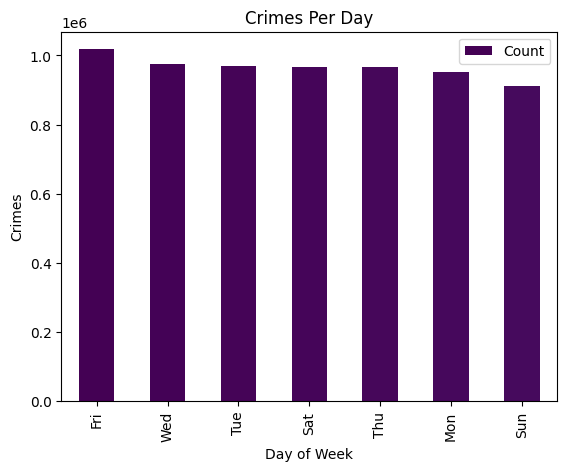

In [90]:
cp_sorted = cp.sort_values('Count', ascending=False)
colors = plt.cm.viridis(range(len(cp_sorted)))
cp.sort_values('Count',ascending=False).plot(kind='bar',x='Day of Week', y = 'Count',color=colors)
plt.xlabel('Day of Week')
plt.ylabel('Crimes')
plt.title('Crimes Per Day')

## (05-01) RDDs setup

In [91]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

In [ ]:
psrdd = sc.textFile('police-station.csv')

In [94]:
psrdd.first()

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 79.0 failed 1 times, most recent failure: Lost task 0.0 in stage 79.0 (TID 326) (W-PF3FWWJJ executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:601)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:583)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:772)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:749)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:514)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:179)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2303)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:838)
Caused by: java.io.EOFException
	at java.io.DataInputStream.readInt(DataInputStream.java:392)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:757)
	... 30 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:179)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:838)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:601)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:583)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:772)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:749)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:514)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$.$anonfun$runJob$1(PythonRDD.scala:179)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2303)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
Caused by: java.io.EOFException
	at java.io.DataInputStream.readInt(DataInputStream.java:392)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:757)
	... 30 more


**How many police stations are there?**

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**